# Data Visualization
## 1. Investigator distribution
In this section, we defined 3 kinds of authors/investigators: 1) Authors with available datasets online and sites(Both Invested_Site and SiteYear_Total > 0); 2) Authors with available sites but share no datasets(Invested_Site>0 and SiteYear_Total = 0); 3) Authors with neither datasets or sites.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Investigator distribution in author list
Data = pd.read_csv('D:/_Research/Project_Sharing_Data_FromLinux/ProjectRebuild_2017/Data/Sites_LeaderRank_AuthorList.csv', sep = ',', encoding = 'utf-8')

Investtag = []
for index, item in Data.iterrows():
    if item.Invested_Site > 0 and item.SiteYear_Total > 0:
        Investtag.append(2)
    elif item.Invested_Site > 0  and item.SiteYear_Total == 0:
        Investtag.append(1)
    else:
        Investtag.append(0)
Data['AuthorTag'] = Investtag
Data.to_csv('D:/_Research/Project_Sharing_Data_FromLinux/ProjectRebuild_2017/Data/Sites_LeaderRank_AuthorList_withTag.csv')
Data

,Universal_Author_Key,Citation_Score,NameIndex,Names,Short_Names,Total_Citation,Total_Publication,LeaderRank,Invested_Site,SiteYear_Total,AuthorTag
0,5448,853.336515,Meyers Tilden P,Meyers T P|Meyers T |Meyers T P|Meyers T P|Mey...,"Meyers, TP|Meyers, T|Meyers, TP|Meyers, TP|Mey...",9211,51,23.480832,US-Aud|US-Bkg|US-Blk|US-Bo1|US-CaV|US-ChR|US-C...,96,2
1,358,8119.723220,Baldocchi Dennis D,Baldocchi D |Baldocchi D |Baldocchi D D|Baldoc...,"Baldocchi, D|Baldocchi, D|Baldocchi, DD|Baldoc...",18176,117,132.691112,US-Bi1|US-Bi2|US-Myb|US-Snd|US-Sne|US-Ton|US-T...,71,2
2,1419,278.343205,Cook Bruce D,Cook B |Cook B D|Cook B D|Cook B |Cook BD |Coo...,"Cook, B|Cook, BD|Cook, BD|Cook, B|Cook, BD|Coo...",1476,19,5.770112,US-Los|US-PFa|US-Syv|US-WCr,70,2
3,1741,585.931171,Desai Ankur R,Desai A R|Desai A R|Desai A R|Desai A R|Desai ...,"Desai, AR|Desai, AR|Desai, AR|Desai, AR|Desai,...",2786,51,11.517155,US-Los|US-PFa|US-Syv|US-WCr,70,2
4,8494,50.620238,Verfaillie Joseph G,Verfaillie J |Verfaillie J |Verfaillie J |Verf...,"Verfaillie, J|Verfaillie, J|Verfaillie, J|Verf...",334,15,5.473919,US-Atq|US-Bi1|US-Bi2|US-Brw|US-HVa|US-Myb|US-S...,63,2
5,568,438.441323,Beringer Jason,Beringer J |Beringer J |Beringer J |Beringer J...,"Beringer, J|Beringer, J|Beringer, J|Beringer, ...",1197,40,10.626261,DK-NuFAU-Ade|AU-DaP|AU-DaS|AU-Dry|AU-Fog|AU-Ho...,60,2
6,903,354.439928,Buchmann Nina,Buchmann N |Buchmann N |Buchmann N |Buchmann N...,"Buchmann, N|Buchmann, N|Buchmann, N|Buchmann, ...",3499,47,10.419541,CH-Aws|CH-Cha|CH-Dav|CH-Fru|CH-Lae|CH-Oe2|PA-S...,56,2
7,8724,72.774457,Wang Weiguo,Wang WG |Wang WG |Wang WG |Wang Weiguo |Wang W...,"Wang, WG|Wang, WG|Wang, WG|Wang, WG|Wang, WG|W...",348,9,2.961964,US-Los|US-PFa|US-WCr,55,2
8,6079,633.383466,Oechel Walter C,Oechel Walter |Oechel Walter |Oechel Walter C|...,"Oechel, W|Oechel, W|Oechel, WC|Oechel, W|Oeche...",6904,70,16.439839,MX-Lpa|RU-Cuk|US-Atq|US-Bes|US-Brw|US-HVa|US-I...,54,2
9,217,494.014999,Arain M Altaf,Arain M A|Arain M Altaf|Arain M Altaf|Arain M ...,"Arain, MA|Arain, MA|Arain, MA|Arain, MA|Arain,...",2608,56,11.690899,CA-TP1|CA-TP2|CA-TP3|CA-TP4|CA-TPD,53,2


Sort the list by LeaderRank, and plot the distribution in 2-D array pseudocolor map.

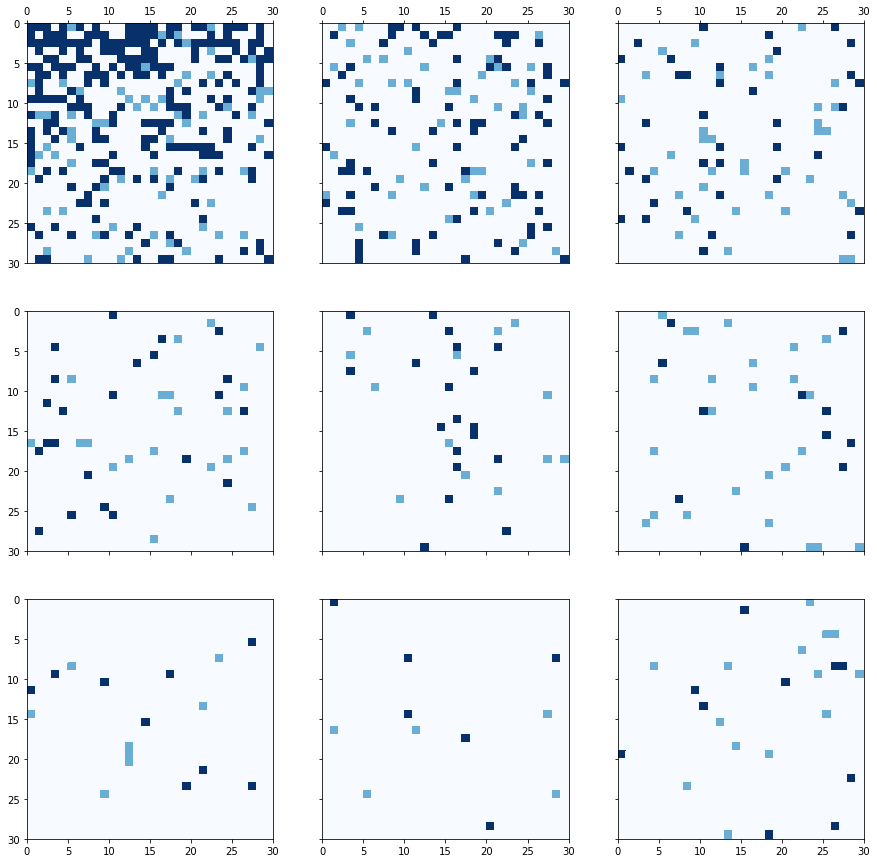

In [5]:
import matplotlib.pyplot as plt
Data = pd.read_csv('D:/_Research/Project_Sharing_Data_FromLinux/ProjectRebuild_2017/Data/Sites_LeaderRank_AuthorList_withTag.csv', sep = ',', encoding = 'utf-8')
Data = Data.sort_values('LeaderRank', ascending = False)

def MatrixView(scale, tickinter, data):
    Matrix = [[[0 for i in range(scale)] for j in range(scale)] for k in range(9)]
    count = 0
    
    for k in range(0,9):
        for i in range(0,scale):
            for j in range(0,scale):
                Matrix[k][i][j] = data.iloc[count]
                count += 1
    
    Matrix = np.array(Matrix)

    fig, ((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8)) = plt.subplots(3,3, sharex=True, sharey=True)
    fig.set_size_inches(15, 15)
    # put the major ticks at the middle of each cell
    tr = range(0, scale + tickinter, tickinter)
    ax0.set_xticks(tr, minor=False)
    ax0.set_yticks(tr, minor=False)
    
    # want a more natural, table-like display
    ax0.invert_yaxis()
    ax0.xaxis.tick_top()
    ax1.xaxis.tick_top()
    ax2.xaxis.tick_top()    

    heatmap = ax0.pcolor(Matrix[0], cmap=plt.cm.Blues)
    heatmap1 = ax1.pcolor(Matrix[1], cmap=plt.cm.Blues)
    heatmap2 = ax2.pcolor(Matrix[2], cmap=plt.cm.Blues)
    heatmap3 = ax3.pcolor(Matrix[3], cmap=plt.cm.Blues)
    heatmap4 = ax4.pcolor(Matrix[4], cmap=plt.cm.Blues)
    heatmap5 = ax5.pcolor(Matrix[5], cmap=plt.cm.Blues)
    heatmap6 = ax6.pcolor(Matrix[6], cmap=plt.cm.Blues)
    heatmap7 = ax7.pcolor(Matrix[7], cmap=plt.cm.Blues)
    heatmap8 = ax8.pcolor(Matrix[8], cmap=plt.cm.Blues)
    plt.show()

MatrixView(30, 5, Data.AuthorTag)

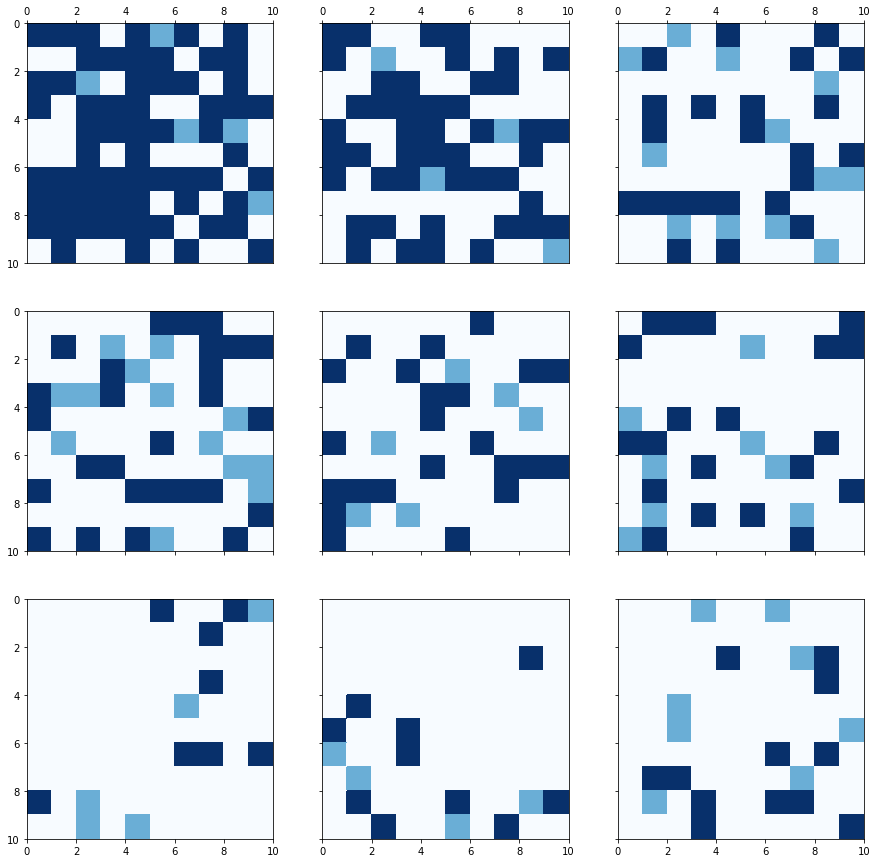

In [6]:
MatrixView(10, 2, Data.AuthorTag)